# Setup (Run contents before running any experiment)

In [1]:
import scipy.io

# prereqs import
import pandas as pd
import numpy as np
import math
import re
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

# load matlab data
mat = scipy.io.loadmat('matlab/emnist-balanced')
mat.keys()
data = mat['dataset']

# see page 4 of the paper on emnist
# uncertain what 3rd entry is in dataset
X_train = data['train'][0,0]['images'][0,0]
y_train = data['train'][0,0]['labels'][0,0]
X_test = data['test'][0,0]['images'][0,0]
y_test = data['test'][0,0]['labels'][0,0]

# try proccessing data (pixel values from EMINST are not normalized, 0-255)
def rescale_DivideBy255(inputData):
    outputArray = []
    for i in range(len(inputData)):
        outputArray.append(inputData[i]/255)

    return outputArray

X_train_normalized = rescale_DivideBy255(X_train)
X_test_normalized = rescale_DivideBy255(X_test)

train_data = X_train_normalized
train_target = y_train
test_data = X_test_normalized
test_target = y_test

In [2]:
# use ski kit learns kcv method -> cross_val_score, take return type and get .mean()
# most of the code throws warnings unless specifically ignore
import warnings
warnings.filterwarnings('ignore')

# Test NN

In [ ]:
from sklearn import neural_network
testNN = neural_network.MLPClassifier(hidden_layer_sizes=(1,))
testNN.fit(train_data,train_target)

In [ ]:
# cv=2> results in kfold split using (Stratified)KFold/KFold from scikit learn
from sklearn.model_selection import cross_val_score
scores = cross_val_score(testNN,train_data,train_target,cv=2)

In [ ]:
#average accuracy across kfold cv
scores.mean()

In [ ]:
testNN.score(train_data,train_target)

In [ ]:
# save(pickle) the model for later. Save to disk
from joblib import dump,load
dump(testNN,'testPickleNN.joblib') #file name will be put in same folder as this notebook

## Test loading pickled model

In [ ]:
# test load pickeld model from disk
from joblib import load
testNN_2 = load('testPickleNN.joblib')
testNN_2.score(train_data,train_target)

# E0 - mock experiment scafold

### E0 - Setup

In [3]:
# setup global file names
# change these names to be unique
store_models_name = 'e0_simpleLayers_models.joblib'
store_results_name = 'e0_simpleLayers_results.joblib'

# define hyper parameter
# hidden_layer_sizes, naive experiment for fast demonstration of scafold
hp = [(1,),(2,),(3,)]

### E0 - training

In [ ]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [ ]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

### E0 - Model Evaluation

In [ ]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [ ]:
# store results
from joblib import dump
dump(result_y,store_results_name)

## E0 - Plot

In [4]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of nodes in the first(and only) hidden layer
plot_x = [item[0] for item in hp]

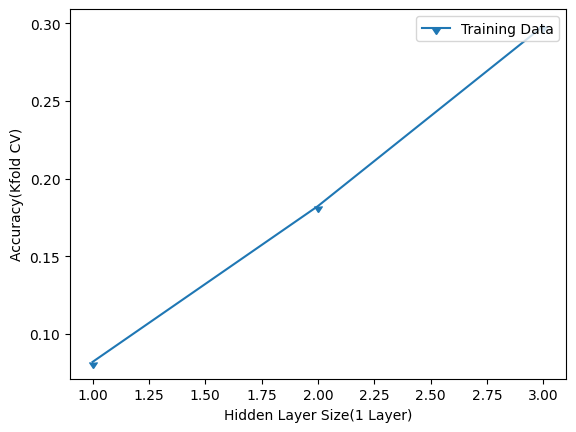

In [5]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Size(1 Layer)")
ax.set_ylabel("Accuracy(Kfold CV)")
ax.plot(plot_x, plot_y,label="Training Data",marker=11)
ax.legend(loc='upper right')
plt.show()

# E1 - Iteration Number 1

### E1 - Setup

In [ ]:
# setup global file names
# change these names to be unique
store_models_name = 'e1_iternum1_models.joblib'
store_results_name = 'e1_iternum1_results.joblib'

In [ ]:
# define hyper parameter
# Iteration number, default is 200, get snap shot accuracies outside boundary
# number of times individual data point is used to train algorithm
hp = list(range(50,600,150))
hp

### E1 - training

In [ ]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(max_iter=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [ ]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

### E1 - Model Evaluation

In [ ]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [ ]:
# store results
from joblib import dump
dump(result_y,store_results_name)

## E1 - Plot

In [ ]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = hp

In [ ]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Iteration Number")
ax.set_ylabel("Accuracy(Kfold CV)")
ax.plot(plot_x, plot_y,label="Training Data",marker=11)
ax.legend(loc='upper right')
plt.show()

# E2 - Layers Tuning 1 - Increasing Layer number
Try hyper parameter where number of hidden layers goes from 1 to 4. Try with number nodes = 100.

In [6]:
# setup global file names
store_models_name = 'e2_ltune1_models.joblib'
store_results_name = 'e2_ltune1_results.joblib'

# define hyper parameter
# hidden_layer number, size remains constant.
hp = [(100,),(100,100),(100,100,100),(100,100,100,100),(100,100,100,100,100)]

### E2 - training

In [ ]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [ ]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

### E2 - Model Evaluation

In [ ]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [ ]:
# store results
from joblib import dump
dump(result_y,store_results_name)

## E2 - Plot

In [7]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of hidden layers (size = 100)
plot_x = [len(item) for item in hp]

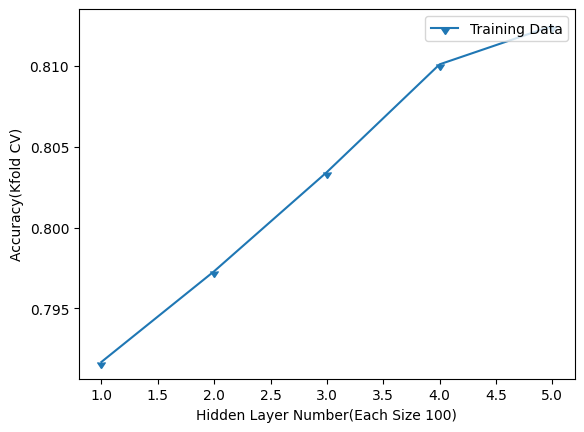

In [8]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Number(Each Size 100)")
ax.set_ylabel("Accuracy(Kfold CV)")
ax.plot(plot_x, plot_y,label="Training Data",marker=11)
ax.legend(loc='upper right')
plt.show()

We see from above that increasing layers had greater accuracy, we know as a benchmark 1000 node single layer had 83% accuracy.
We should try increasing the layers more and see when diminishing returns occurs

# E3 - Layers - Double size of layers(200), increasing layer number

### E3 - Setup

In [9]:
# setup global file names
# change these names to be unique
store_models_name = 'e3_1hiddenLayersSizeInc_models.joblib'
store_results_name = 'e3_1hiddenLayersSizeInc_results.joblib'

# define hyper parameter
# double size of layers from e2
layerSize = 200
hp = [(layerSize,),
      (layerSize,layerSize),
      (layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize),
      (layerSize,layerSize,layerSize,layerSize,layerSize)
      ]
hp

[(200,),
 (200, 200),
 (200, 200, 200),
 (200, 200, 200, 200),
 (200, 200, 200, 200, 200)]

### E3 - Training

In [11]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [12]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

['e3_1hiddenLayersSizeInc_models.joblib']

### E3 - Model Evaluation

In [13]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [14]:
# store results
from joblib import dump
dump(result_y,store_results_name)

['e3_1hiddenLayersSizeInc_results.joblib']

## E3 - Plot

In [17]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = [len(item) for item in hp]

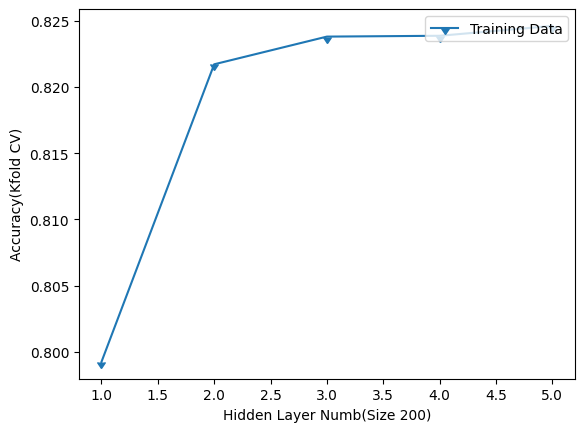

In [18]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Numb(Size 200)")
ax.set_ylabel("Accuracy(Kfold CV)")
ax.plot(plot_x, plot_y,label="Training Data",marker=11)
ax.legend(loc='upper right')
plt.show()

# E4 - Layers - Hidden Layers with high number of nodes

In [ ]:
# setup global file names
# change these names to be unique
store_models_name = 'e4_2hiddenLayersSizeInc_models.joblib'
store_results_name = 'e4_2hiddenLayersSizeInc_results.joblib'

In [ ]:
# define hyper parameter
# 2 hidden layer of increasing size
layerSize = 300
hp = [(layerSize,layerSize),(2*layerSize,2*layerSize),(3*layerSize,3*layerSize),(4*layerSize,4*layerSize)]
hp

### E4 - training

In [ ]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(max_iter=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [ ]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

### E4 - model eval

In [ ]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [ ]:
# store results
from joblib import dump
dump(result_y,store_results_name)

## E4 - Plot

In [ ]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of iterations
plot_x = hp

In [ ]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("2 Hidden Layers Size")
ax.set_ylabel("Accuracy(Kfold CV)")
ax.plot(plot_x, plot_y,label="Training Data",marker=11)
ax.legend(loc='upper right')
plt.show()

# Final (go to moon) and test tuned model on test set